In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel'],
      dtype='object')

In [5]:
#those function will cotegorize the jobs based on the title

def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [6]:
df['job_simp'] =df['Job Title'].apply(title_simplifier)

In [7]:
df.job_simp.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: job_simp, dtype: int64

In [8]:
df['seniority']= df['Job Title'].apply(seniority )
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [9]:
#fix los aneglos state
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()
df.drop('job_state',inplace=True , axis=1)


In [10]:
#description lenght
df['desc_len']= df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

In [11]:
#competitor count
df['num_comp']=df['Competitors'].apply(lambda x: len(x.split()) if x != '-1' else 0)
df.num_comp.value_counts()

0     460
4      69
3      55
5      53
6      34
2      25
7      16
12     12
1       5
9       4
10      4
8       3
14      1
11      1
Name: num_comp, dtype: int64

In [12]:
df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
737                           Pfizer, AstraZeneca, Merck
738                      See Tickets, TicketWeb, Vendini
739                                                   -1
740                                                   -1
741                                                   -1
Name: Competitors, Length: 742, dtype: object

In [13]:
#hourly wage to annual 

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)


In [14]:
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [15]:

df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))

In [16]:
df['company_txt']


0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

In [17]:
df.describe()


,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.814016
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,2.738326
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,4.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,14.000000


In [18]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'same_state', 'age', 'python_yn', 'R_yn', 'spark', 'aws',
       'excel', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

<AxesSubplot: >

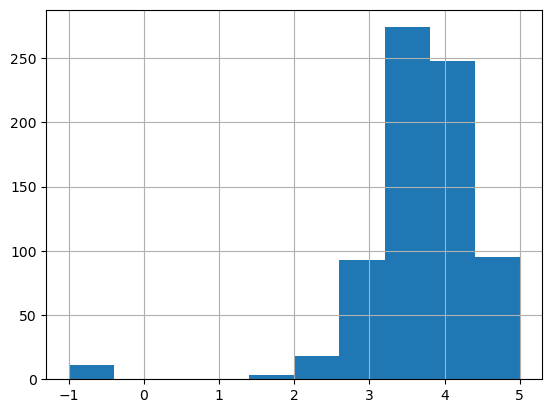

In [19]:
df.Rating.hist()

<AxesSubplot: >

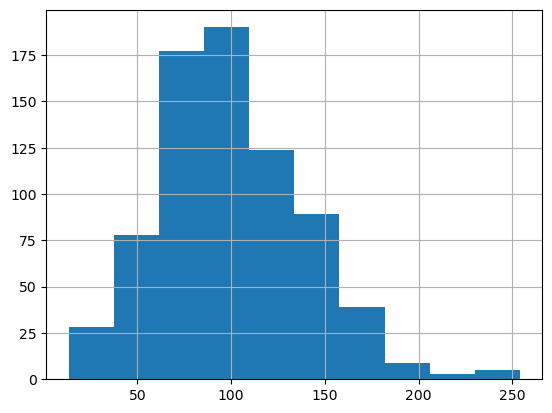

In [20]:
df.avg_salary.hist()

<AxesSubplot: >

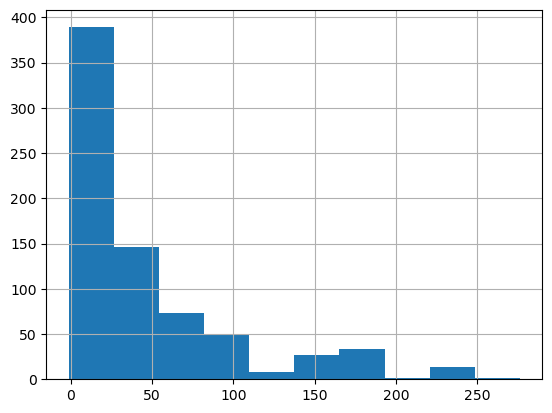

In [21]:
df.age.hist()


<AxesSubplot: >

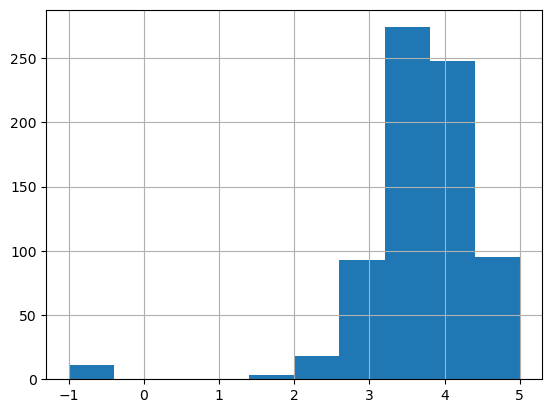

In [22]:
df.Rating.hist()

<AxesSubplot: >

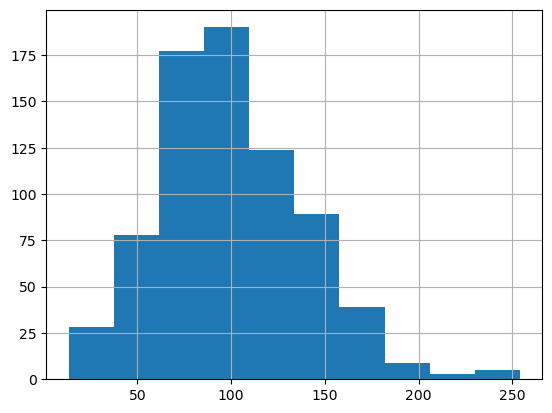

In [23]:
df.avg_salary.hist()

<AxesSubplot: >

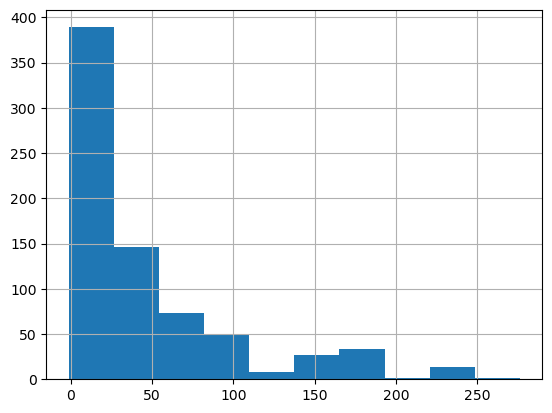

In [24]:
df.age.hist()


<AxesSubplot: >

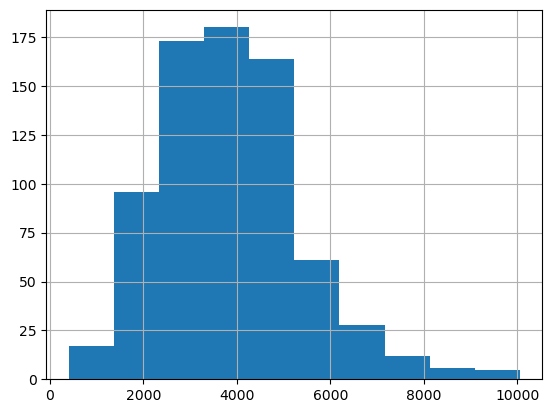

In [25]:
df.desc_len.hist()


<AxesSubplot: >

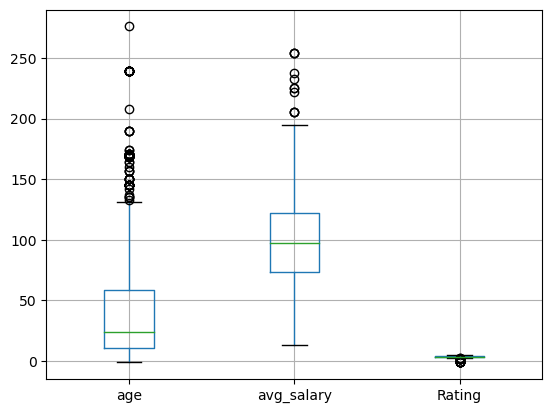

In [26]:
df.boxplot(column = ['age','avg_salary','Rating'])

<AxesSubplot: >

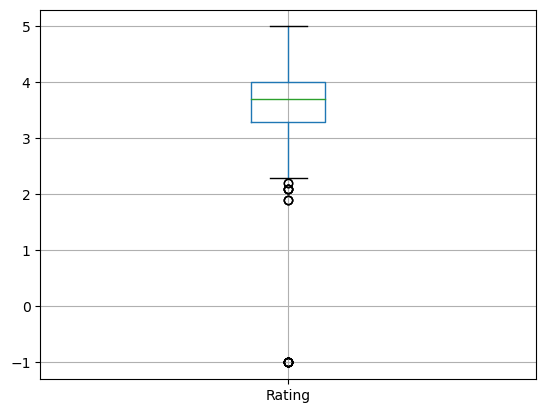

In [27]:
df.boxplot(column = 'Rating')


In [28]:
df[['age','avg_salary','Rating','desc_len']].corr()


,age,avg_salary,Rating,desc_len
age,1.000000,0.019655,0.021655,0.163911
avg_salary,0.019655,1.000000,0.013492,0.078808
Rating,0.021655,0.013492,1.000000,-0.012281
desc_len,0.163911,0.078808,-0.012281,1.000000


<AxesSubplot: >

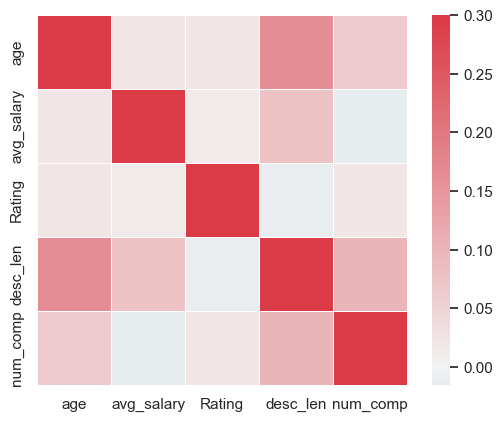

In [29]:
sns.set_theme(style="white")
cmap = sns.diverging_palette(230, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len','num_comp']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": 1})


In [30]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'same_state', 'age', 'python_yn', 'R_yn', 'spark', 'aws',
       'excel', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [31]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'same_state', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority']]


graph for Location: total = 200


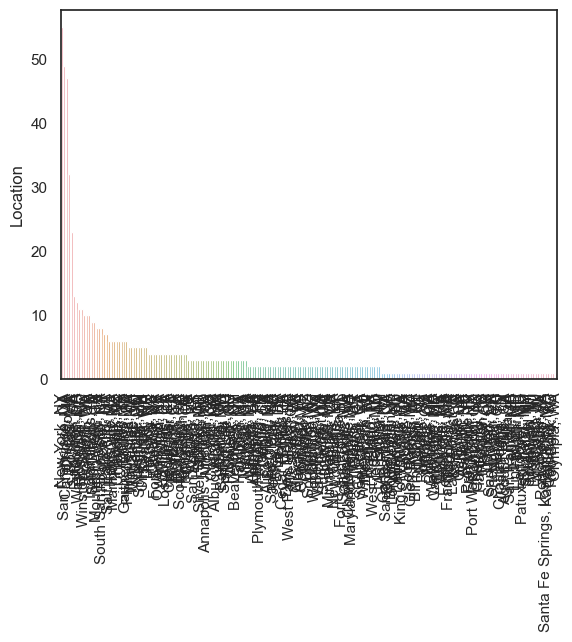

graph for Headquarters: total = 198


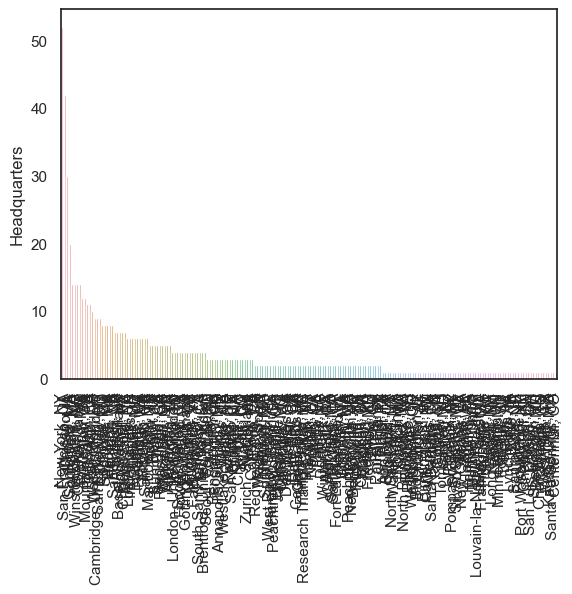

graph for Size: total = 9


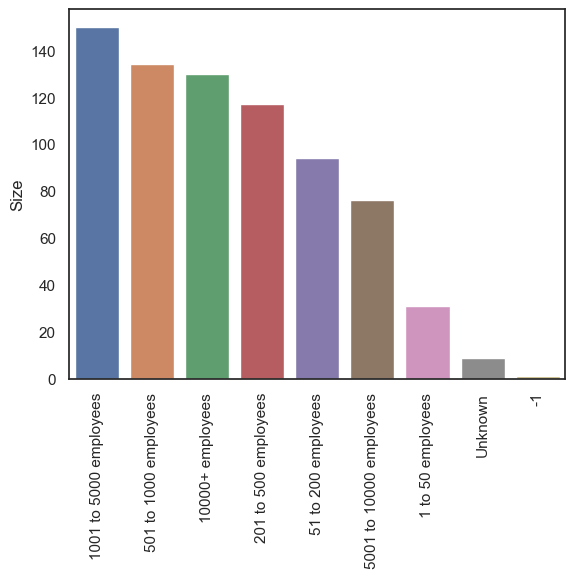

graph for Type of ownership: total = 11


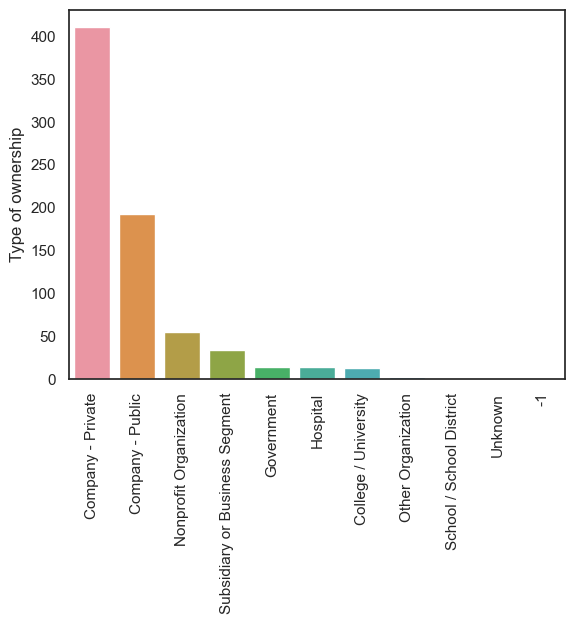

graph for Industry: total = 60


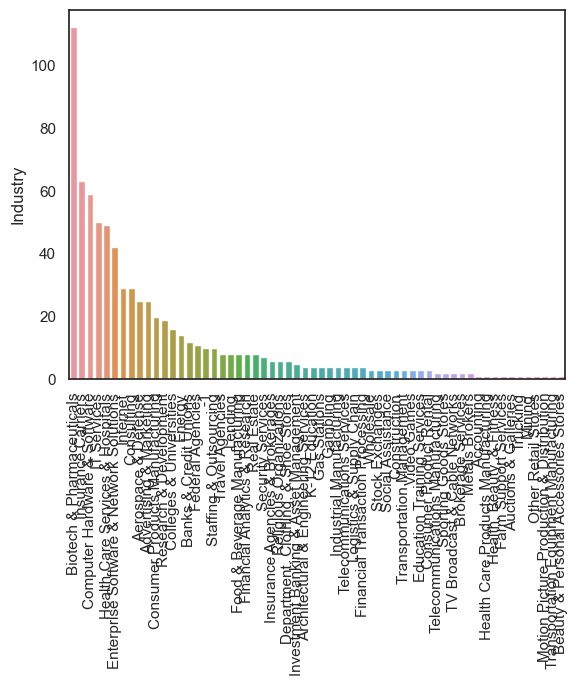

graph for Sector: total = 25


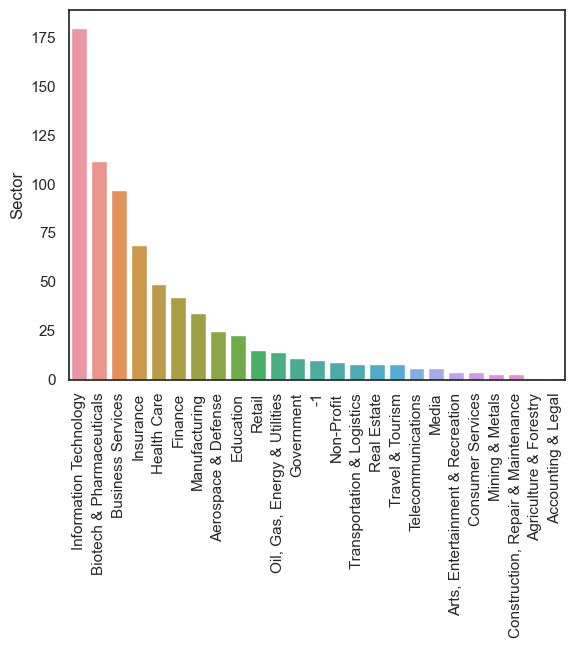

graph for Revenue: total = 14


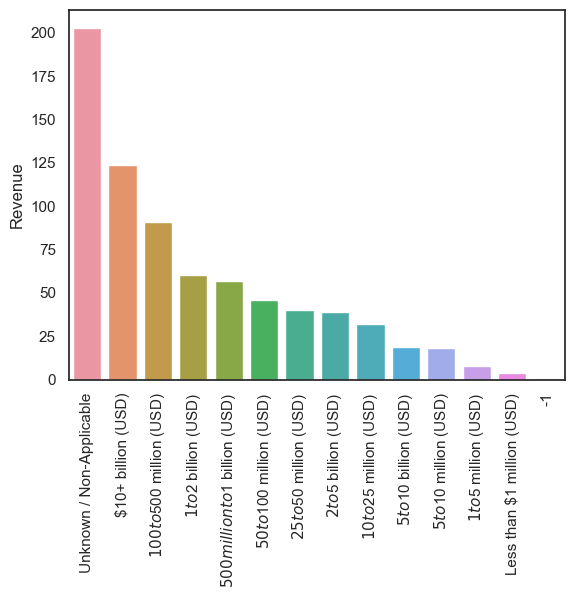

graph for company_txt: total = 343


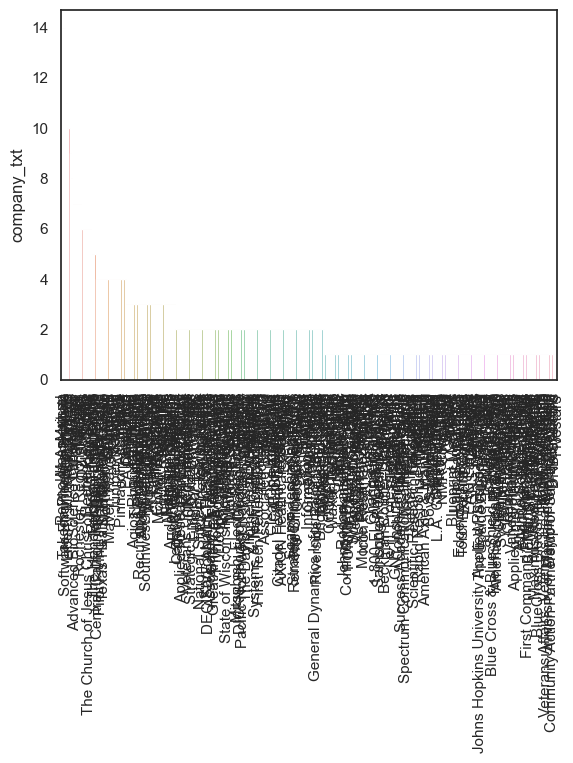

graph for same_state: total = 2


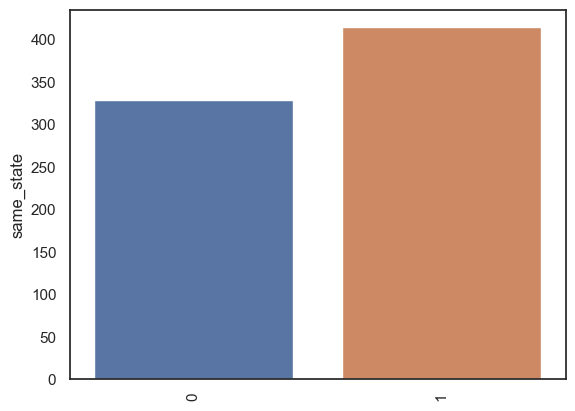

graph for python_yn: total = 2


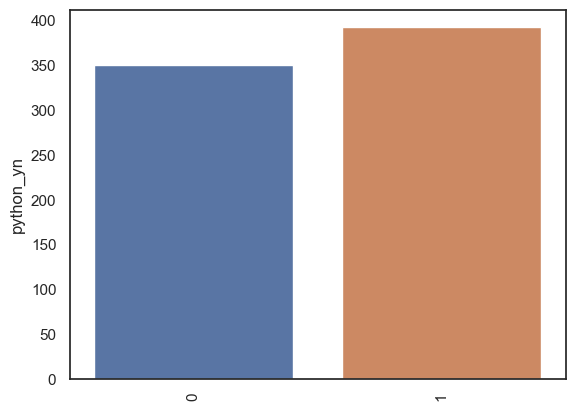

graph for R_yn: total = 2


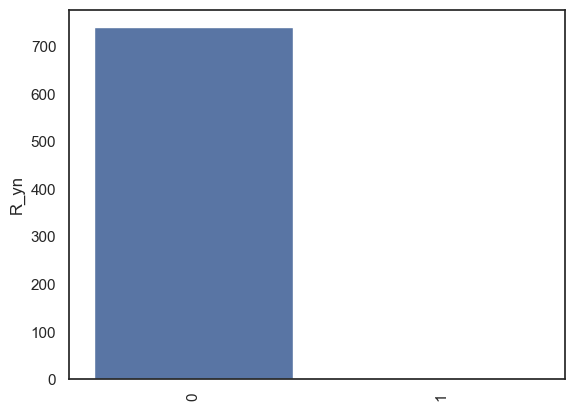

graph for spark: total = 2


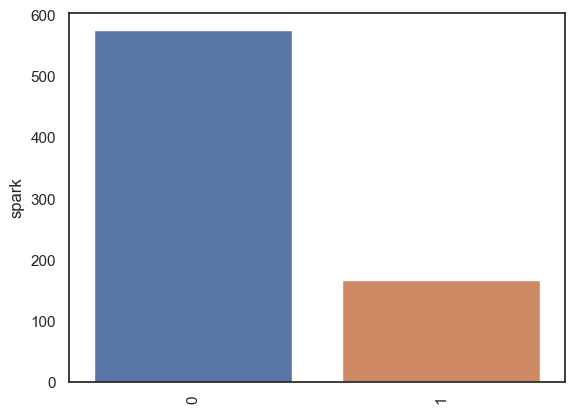

graph for aws: total = 2


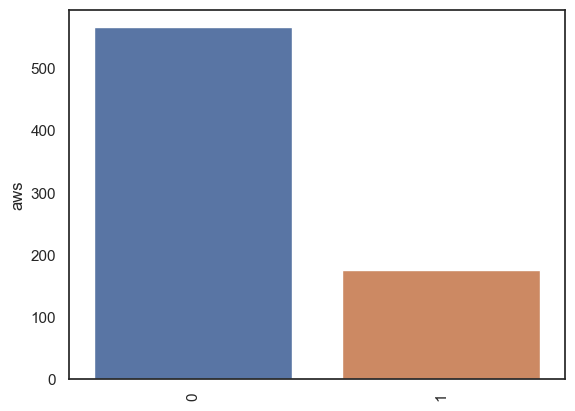

graph for excel: total = 2


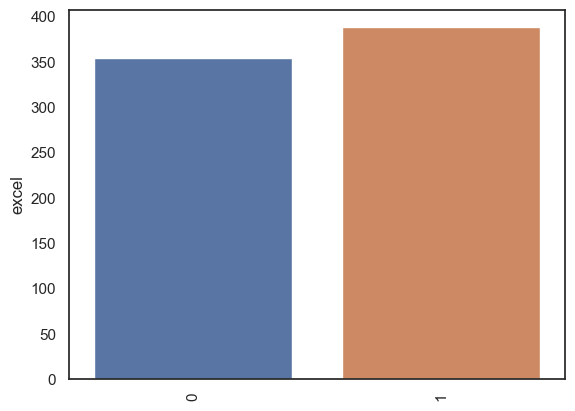

graph for job_simp: total = 7


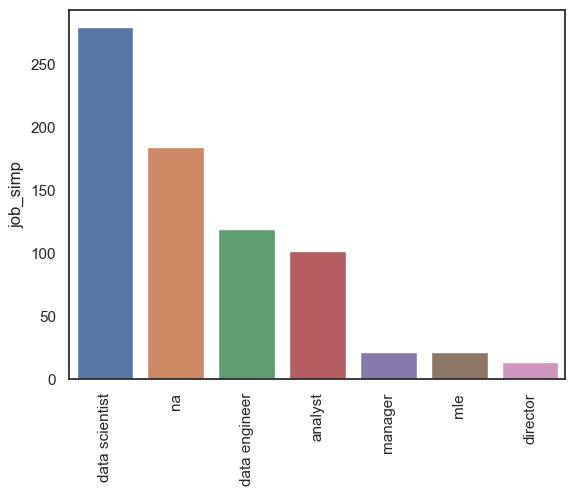

graph for seniority: total = 3


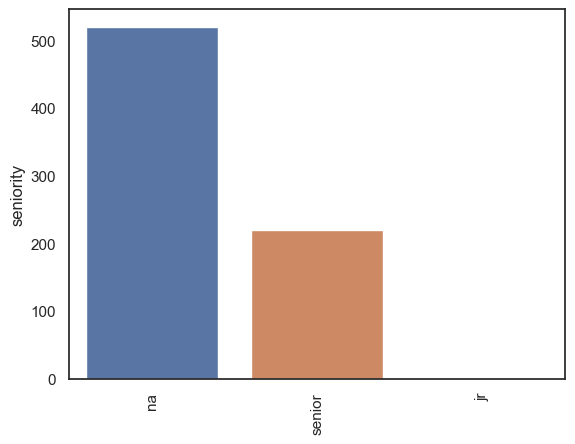

In [32]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


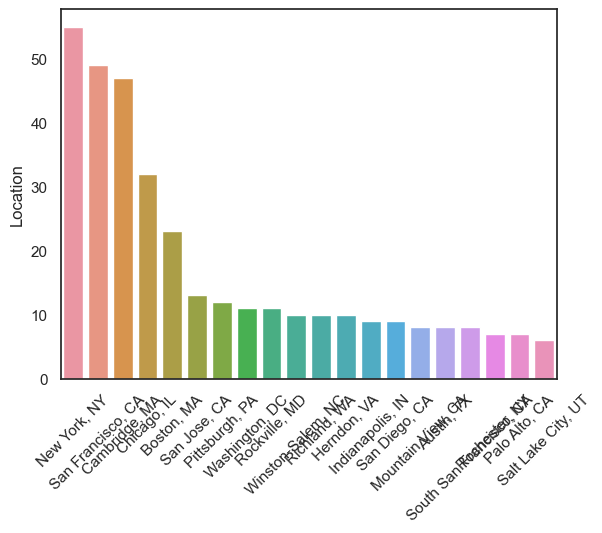

graph for Headquarters: total = 20


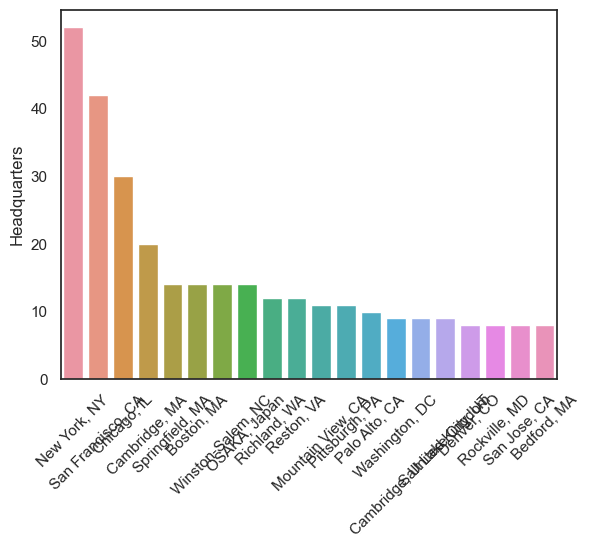

graph for company_txt: total = 20


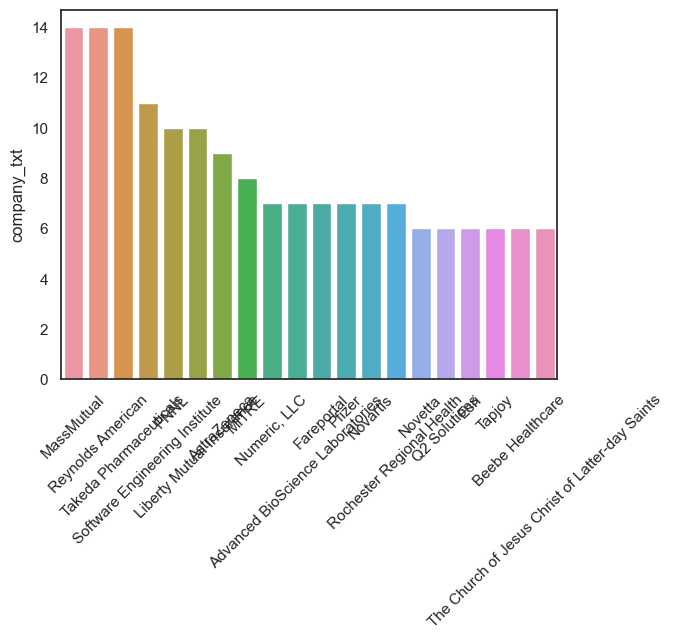

In [33]:
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
    plt.show()

    

In [34]:
df.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'same_state', 'age', 'python_yn', 'R_yn', 'spark', 'aws',
       'excel', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [35]:
pd.pivot_table(df,index = 'job_simp',values ='avg_salary')

,avg_salary
job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [36]:
pd.pivot_table(df,index = 'python_yn',values ='avg_salary')

,avg_salary
python_yn,
0,87.155714
1,112.653061


In [37]:
pd.pivot_table(df,index = 'hourly',values ='avg_salary')

,avg_salary
hourly,
0,103.1539
1,25.0000


In [38]:
pd.pivot_table(df,index = 'seniority',values ='avg_salary')

,avg_salary
seniority,
jr,81.500000
na,91.841346
senior,121.563636


In [39]:
pd.pivot_table(df,index = 'aws',values ='avg_salary')

,avg_salary
aws,
0,96.915194
1,112.559659


In [40]:
pd.pivot_table(df,index = ['seniority','python_yn'],values ='avg_salary')

avg_salary
seniority python_yn            
jr        0           56.500000
          1          106.500000
na        0           79.721344
          1          103.325843
senior    0          107.067708
          1          132.786290

In [41]:
pd.pivot_table(df,index = ['job_simp','python_yn'],values ='avg_salary')

avg_salary
job_simp       python_yn            
analyst        0           60.985714
               1           76.515625
data engineer  0          105.488095
               1          105.357143
data scientist 0          115.849206
               1          118.064815
director       0          117.833333
               1          206.687500
manager        0           76.875000
               1          103.083333
mle            0          124.000000
               1          126.972222
na             0           81.030201
               1          101.128571

In [42]:
pd.pivot_table(df,index = ['excel','python_yn','seniority'],values ='avg_salary')

avg_salary
excel python_yn seniority            
0     0         na          77.429907
                senior     107.633929
      1         na         108.354331
                senior     130.812500
1     0         jr          56.500000
                na          81.400685
                senior     106.275000
      1         jr         106.500000
                na          98.764286
                senior     134.891667

In [43]:
pd.pivot_table(df[df.hourly==0],index = ['Location',],values ='avg_salary').sort_values('avg_salary',ascending = False)



,avg_salary
Location,
"Bellevue, WA",184.5000
"Lake Forest, IL",179.5000
"Mountain View, CA",177.1875
"Novato, CA",168.0000
"Burbank, CA",164.0000
...,...
"Cedar Rapids, IA",43.0000
"Kansas City, MO",40.5000
"Alabaster, AL",39.5000


In [44]:
pd.pivot_table(df[df.hourly==0],index = ['job_simp'],values='avg_salary').sort_values('avg_salary',ascending = False)


,avg_salary
job_simp,
director,168.607143
mle,126.431818
data scientist,117.564516
data engineer,105.403361
na,92.839506
manager,84.022727
analyst,66.905000


In [45]:
pd.pivot_table(df[df.hourly==0],index = ['job_simp'],values='avg_salary').sort_values('avg_salary',ascending = False)


,avg_salary
job_simp,
director,168.607143
mle,126.431818
data scientist,117.564516
data engineer,105.403361
na,92.839506
manager,84.022727
analyst,66.905000


In [46]:
pd.pivot_table(df[df.hourly==0],index = ['job_simp','python_yn'],values='avg_salary').sort_values('avg_salary',ascending = False)


avg_salary
job_simp       python_yn            
director       1          206.687500
mle            1          126.972222
               0          124.000000
data scientist 1          118.064815
director       0          117.833333
data scientist 0          115.849206
data engineer  0          105.488095
               1          105.357143
manager        1          103.083333
na             1          101.128571
               0           90.555118
manager        0           76.875000
analyst        1           76.515625
               0           62.382353

In [47]:
pd.pivot_table(df[df.hourly==0],index = ['Sector'],values=['python_yn'],aggfunc='count').sort_values('python_yn',ascending = False)


,python_yn
Sector,
Information Technology,180
Biotech & Pharmaceuticals,111
Business Services,97
Insurance,69
Finance,40
Manufacturing,34
Health Care,32
Aerospace & Defense,25
Education,23


In [48]:
pd.pivot_table(df[df.hourly==0],index = ['Sector'],values=['avg_salary']).sort_values('avg_salary',ascending = False)


,avg_salary
Sector,
Media,116.666667
-1,114.650000
Accounting & Legal,113.500000
Information Technology,113.191667
Biotech & Pharmaceuticals,112.441441
Insurance,105.942029
Real Estate,104.750000
Mining & Metals,104.000000
Telecommunications,102.333333


In [67]:
pd.pivot_table(df[df.hourly==0],index = ['Sector'],values=['avg_salary','python_yn'], aggfunc ={
    'avg_salary':np.mean,
    'python_yn':'count'
    
}).sort_values('avg_salary',ascending = False)


,avg_salary,python_yn
Sector,,
Media,116.666667,6
-1,114.650000,10
Accounting & Legal,113.500000,1
Information Technology,113.191667,180
Biotech & Pharmaceuticals,112.441441,111
Insurance,105.942029,69
Real Estate,104.750000,8
Mining & Metals,104.000000,3
Telecommunications,102.333333,6


In [53]:
df_pivots = df.columns
df_pivots

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'same_state', 'age', 'python_yn', 'R_yn', 'spark', 'aws',
       'excel', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [68]:
for i in df_pivots : 
    print(i)
    print(pd.pivot_table(df,index = i,values=['avg_salary']).sort_values('avg_salary',ascending = False))
          

Job Title
                                                    avg_salary
Job Title                                                     
Director II, Data Science - GRM Actuarial                254.0
Principal Machine Learning Scientist                     232.5
Principal Data Scientist with over 10 years exp...       225.0
Lead Data Engineer                                       205.0
Director II, Data Science - GRS Predictive Anal...       194.5
...                                                        ...
Medical Lab Scientist - MLT                               25.0
Medical Laboratory Scientist                              21.5
Medical Lab Scientist                                     20.5
Medical Technologist / Clinical Laboratory Scie...        20.0
Senior Operations Data Analyst, Call Center Ope...        13.5

[264 rows x 1 columns]
Salary Estimate
                                      avg_salary
Salary Estimate                                 
$202K-$306K (Glassdoor est.)     

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [84]:
pd.pivot_table(df[df.hourly==0],index = ['job_simp'],columns='python_yn',values=['Sector','avg_salary'],aggfunc={
    'Sector':'count','avg_salary':np.mean
})



Sector       avg_salary            
python_yn           0    1           0           1
job_simp                                          
analyst            68   32   62.382353   76.515625
data engineer      42   77  105.488095  105.357143
data scientist     63  216  115.849206  118.064815
director            6    8  117.833333  206.687500
manager            16    6   76.875000  103.083333
mle                 4   18  124.000000  126.972222
na                127   35   90.555118  101.128571

In [89]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [87]:
import sys
!{sys.executable} -m pip install nltk


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 489.4 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 548.9 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 754.8 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.9/293.9 kB 533.4 kB/s eta 0:00:00a 0:00:01


In [92]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(interpolation="bilinear")
plt.axis('off')
plt.show()

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/Users/baderzakaria/nltk_data'
    - '/Users/baderzakaria/opt/anaconda3/envs/ds_salary_proj/nltk_data'
    - '/Users/baderzakaria/opt/anaconda3/envs/ds_salary_proj/share/nltk_data'
    - '/Users/baderzakaria/opt/anaconda3/envs/ds_salary_proj/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


In [94]:
import nltk 
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/baderzakaria/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/baderzakaria/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

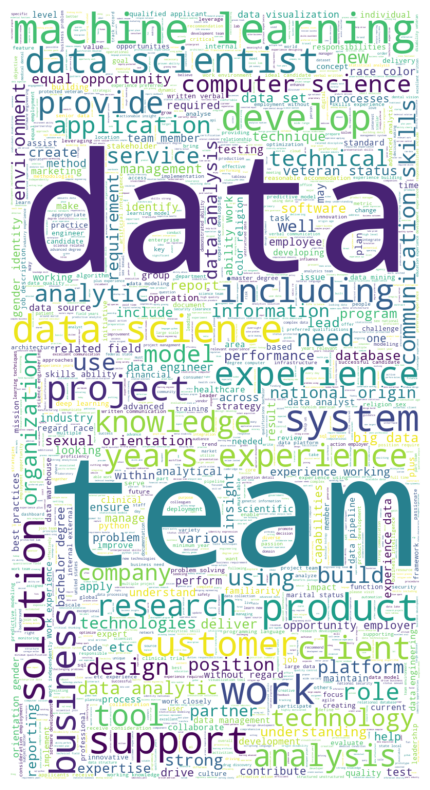

In [96]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()